In [ ]:
!apt install mongodb >log
!service mongodb start



 * Starting database mongodb
   ...done.


In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
!mongo #Correr consola y crear base de datos con el comando: 
# use ViinaDB;
# exit;

MongoDB shell version v3.6.3
connecting to: mongodb://127.0.0.1:27017
MongoDB server version: 3.6.3
Welcome to the MongoDB shell.
For interactive help, type "help".
For more comprehensive documentation, see
	http://docs.mongodb.org/
Questions? Try the support group
	http://groups.google.com/group/mongodb-user
Server has startup warnings: 
2022-05-24T00:48:27.124+0000 I CONTROL  [initandlisten] 
2022-05-24T00:48:27.124+0000 I CONTROL  [initandlisten] ** WARNING: Access control is not enabled for the database.
2022-05-24T00:48:27.124+0000 I CONTROL  [initandlisten] **          Read and write access to data and configuration is unrestricted.
2022-05-24T00:48:27.124+0000 I CONTROL  [initandlisten] 
> use ViinaDB;use ViinaDB;
switched to db ViinaDB
> exit;exit;


In [ ]:
from pymongo import MongoClient
client = MongoClient("mongodb://127.0.0.1:27017")

In [ ]:
db = client['viinaDB']
#client.list_database_names() # ['admin', 'local']
#db.collection_names()


In [ ]:
client.list_database_names() # ['admin', 'local']

['admin', 'config', 'local']

In [ ]:
db.PopulatedPlace.insert_one({})
db.ControlStatus.insert_one({})
db.Temporary.insert_one({})
db.Report.insert_one({})
db.Event.insert_one({})
populated_place_collection = db.PopulatedPlace
control_status_collection = db.ControlStatus
temporary_collection = db.Temporary
report_collection = db.Report
event_collection = db.Event

In [ ]:
populated_place_collection.drop()
control_status_collection.drop()
temporary_collection.drop()
report_collection.drop()
event_collection.drop()
#collection.insert_many(list(professor.values()))

In [ ]:
!wget https://raw.githubusercontent.com/zhukovyuri/VIINA/master/Data/events_latest.csv
!wget https://raw.githubusercontent.com/zhukovyuri/VIINA/master/Data/control_latest.csv

--2022-05-24 00:54:56--  https://raw.githubusercontent.com/zhukovyuri/VIINA/master/Data/events_latest.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55774102 (53M) [text/plain]
Saving to: ‘events_latest.csv’

events_latest.csv   100%[===================>]  53.19M   275MB/s    in 0.2s    

2022-05-24 00:54:58 (275 MB/s) - ‘events_latest.csv’ saved [55774102/55774102]

--2022-05-24 00:54:58--  https://raw.githubusercontent.com/zhukovyuri/VIINA/master/Data/control_latest.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 346901

In [ ]:
events_df = pd.read_csv('/content/events_latest.csv')

In [ ]:
control_df = pd.read_csv('/content/control_latest.csv')

In [ ]:
control_df.head()

,geonameid,name,asciiname,alternatenames,longitude,latitude,feature_code,ctr_20220227214017,ctr_20220227215949,ctr_20220228074134,...,ctr_20220514181729,ctr_20220515181825,ctr_20220519070238,ctr_20220519073905,ctr_20220519084805,ctr_20220519180004,ctr_20220520180005,ctr_20220521213505,ctr_20220522081506,ctr_20220522092908
0,461727.0,Olenevka,Olenevka,"Karadzhi,Olenevka,Qaragy,Qarağy,Караджи́,Оленевка",32.53333,45.38333,PPLA3,RU,RU,RU,...,RU,RU,RU,RU,RU,RU,RU,RU,RU,RU
1,467852.0,Yelyzavetyns'kyy,Yelyzavetyns'kyy,"Elizavetins'kij,Elizavetinskij,Yelizavetinskiy...",38.82056,47.84083,PPLX,RU,RU,RU,...,RU,RU,RU,RU,RU,RU,RU,RU,RU,RU
2,468196.0,Katerynivka,Katerynivka,"Katerinivka,Katerinovka,Katerynivka,Kateryniwk...",38.75174,47.69011,PPL,RU,RU,RU,...,RU,RU,RU,RU,RU,RU,RU,RU,RU,RU
3,477085.0,Vaniushkyne,Vaniushkyne,"Vaniushkyne,Vanjushkine,Vanyushkin,Vanyushkyne...",38.27055,47.25507,PPL,RU,RU,RU,...,RU,RU,RU,RU,RU,RU,RU,RU,RU,RU
4,485524.0,Svistuny,Svistuny,NaN,38.40694,47.72639,PPL,RU,RU,RU,...,RU,RU,RU,RU,RU,RU,RU,RU,RU,RU


In [ ]:
events_df.head()

,event_id,report_id,location,tempid,source,date,url,time,text,lang,...,t_ied_b,t_property_b,t_raid_b,t_occupy_b,t_cyber_b,t_hospital_b,t_milcas_b,t_civcas_b,t_nmil_pred,t_nmil_b
0,1,40940,1,128550,ria,20220224,https://ria.ru/20220224/gorlovka-1774602728.html,00:10,"Украинские военные обстреляли Горловку, заявил...",ru,...,0,0,0,0,0,0,0,0,0.000004,0
1,2,40940,2,128550,ria,20220224,https://ria.ru/20220224/gorlovka-1774602728.html,00:10,"Украинские военные обстреляли Горловку, заявил...",ru,...,0,0,0,0,0,0,0,0,0.000004,0
2,3,18181,1,45730,liga,20220224,https://www.liga.net/archive/2022-02-24/all/pa...,00:23,Оккупанты перестали пропускать в Крым украинск...,ru,...,0,0,1,0,0,0,0,0,0.926301,1
3,4,47245,1,172452,unian,20220224,https://www.unian.ua/news/archive/20220224,00:35,"На ніч закрили аеропорти Харкова, Дніпра та За...",ua,...,0,0,0,0,0,0,0,0,0.000005,0
4,5,47245,2,172452,unian,20220224,https://www.unian.ua/news/archive/20220224,00:35,"На ніч закрили аеропорти Харкова, Дніпра та За...",ua,...,0,0,0,0,0,0,0,0,0.000005,0


## Events Dataset Cleaning

### Dropping unnecesary colums

In [ ]:
#This columns need to be dropped from the dataset:
to_drop = events_df.keys()[15:]
to_drop

Index(['t_mil_pred', 't_loc_pred', 't_san_pred', 'a_rus_pred', 'a_ukr_pred',
       'a_civ_pred', 'a_other_pred', 't_aad_pred', 't_airstrike_pred',
       't_armor_pred', 't_arrest_pred', 't_artillery_pred', 't_control_pred',
       't_killing_pred', 't_firefight_pred', 't_ied_pred', 't_property_pred',
       't_raid_pred', 't_occupy_pred', 't_cyber_pred', 't_hospital_pred',
       't_milcas_pred', 't_civcas_pred', 't_mil_b', 't_loc_b', 't_san_b',
       'a_rus_b', 'a_ukr_b', 'a_civ_b', 'a_other_b', 't_aad_b',
       't_airstrike_b', 't_armor_b', 't_arrest_b', 't_artillery_b',
       't_control_b', 't_killing_b', 't_firefight_b', 't_ied_b',
       't_property_b', 't_raid_b', 't_occupy_b', 't_cyber_b', 't_hospital_b',
       't_milcas_b', 't_civcas_b', 't_nmil_pred', 't_nmil_b'],
      dtype='object')

In [ ]:
events_df.drop(to_drop, inplace=True, axis=1)

### Change date format

In [ ]:
events_df['date'] = pd.to_datetime(events_df['date'].astype(str), format='%Y/%m/%d')
events_df['date'] = events_df['date'].dt.strftime('%Y/%m/%d')

In [ ]:
events_df.head()

,event_id,report_id,location,tempid,source,date,url,time,text,lang,address,longitude,latitude,GEO_PRECISION,GEO_API
0,1,40940,1,128550,ria,2022/02/24,https://ria.ru/20220224/gorlovka-1774602728.html,00:10,"Украинские военные обстреляли Горловку, заявил...",ru,"Украина, Донецкая область, Горловка",38.002536,48.306080,ADM3,Yandex
1,2,40940,2,128550,ria,2022/02/24,https://ria.ru/20220224/gorlovka-1774602728.html,00:10,"Украинские военные обстреляли Горловку, заявил...",ru,"Украина, Донецк",37.802850,48.015884,ADM3,Yandex
2,3,18181,1,45730,liga,2022/02/24,https://www.liga.net/archive/2022-02-24/all/pa...,00:23,Оккупанты перестали пропускать в Крым украинск...,ru,"Украина, 7, улица Александра Невского, Централ...",34.099413,44.953634,ADM3,Yandex
3,4,47245,1,172452,unian,2022/02/24,https://www.unian.ua/news/archive/20220224,00:35,"На ніч закрили аеропорти Харкова, Дніпра та За...",ua,"Украина, Харьков",36.231202,49.992167,ADM3,Yandex
4,5,47245,2,172452,unian,2022/02/24,https://www.unian.ua/news/archive/20220224,00:35,"На ніч закрили аеропорти Харкова, Дніпра та За...",ua,"Украина, Днепр",35.046181,48.464717,ADM3,Yandex


### Cheking for missing values

In [ ]:
events_df.isnull().sum()

event_id            0
report_id           0
location            0
tempid              0
source              0
date                0
url              1265
time                0
text                0
lang                0
address             0
longitude           0
latitude            0
GEO_PRECISION       0
GEO_API             0
dtype: int64

### Checking if there are dates or times with wrong format

In [ ]:
len(events_df) - (events_df['date'].map(str).str.match("^2022/([0-9]){2}/([0-9]){2}")).sum()

0

In [ ]:
len(events_df) - (events_df['time'].map(str).str.match("^([0-9]){2}:([0-9]){2}")).sum()

0

### Change tempid colum's key

In [ ]:
events_df.rename(columns={'tempid': 'temporary_id'}, inplace=True)
events_df.head()

,event_id,report_id,location,temporary_id,source,date,url,time,text,lang,address,longitude,latitude,GEO_PRECISION,GEO_API
0,1,40940,1,128550,ria,2022/02/24,https://ria.ru/20220224/gorlovka-1774602728.html,00:10,"Украинские военные обстреляли Горловку, заявил...",ru,"Украина, Донецкая область, Горловка",38.002536,48.306080,ADM3,Yandex
1,2,40940,2,128550,ria,2022/02/24,https://ria.ru/20220224/gorlovka-1774602728.html,00:10,"Украинские военные обстреляли Горловку, заявил...",ru,"Украина, Донецк",37.802850,48.015884,ADM3,Yandex
2,3,18181,1,45730,liga,2022/02/24,https://www.liga.net/archive/2022-02-24/all/pa...,00:23,Оккупанты перестали пропускать в Крым украинск...,ru,"Украина, 7, улица Александра Невского, Централ...",34.099413,44.953634,ADM3,Yandex
3,4,47245,1,172452,unian,2022/02/24,https://www.unian.ua/news/archive/20220224,00:35,"На ніч закрили аеропорти Харкова, Дніпра та За...",ua,"Украина, Харьков",36.231202,49.992167,ADM3,Yandex
4,5,47245,2,172452,unian,2022/02/24,https://www.unian.ua/news/archive/20220224,00:35,"На ніч закрили аеропорти Харкова, Дніпра та За...",ua,"Украина, Днепр",35.046181,48.464717,ADM3,Yandex


### Extracting Temporary Document

In [ ]:
temporary_df = events_df.copy()
temporary_df.drop(['event_id', 'report_id', 'location', 'source', 'url'], axis=1, inplace=True)
temporary_df.drop(temporary_df.keys()[3:], axis=1, inplace=True)
temporary_df.head()

,temporary_id,date,time
0,128550,2022/02/24,00:10
1,128550,2022/02/24,00:10
2,45730,2022/02/24,00:23
3,172452,2022/02/24,00:35
4,172452,2022/02/24,00:35


### Extracting Report Document

In [ ]:
report_df = events_df.copy()
report_df.drop(['event_id', 'location', 'date', 'time'], axis=1, inplace=True)
report_df.drop(report_df.keys()[6:], axis=1, inplace=True)
report_df.head()

,report_id,temporary_id,source,url,text,lang
0,40940,128550,ria,https://ria.ru/20220224/gorlovka-1774602728.html,"Украинские военные обстреляли Горловку, заявил...",ru
1,40940,128550,ria,https://ria.ru/20220224/gorlovka-1774602728.html,"Украинские военные обстреляли Горловку, заявил...",ru
2,18181,45730,liga,https://www.liga.net/archive/2022-02-24/all/pa...,Оккупанты перестали пропускать в Крым украинск...,ru
3,47245,172452,unian,https://www.unian.ua/news/archive/20220224,"На ніч закрили аеропорти Харкова, Дніпра та За...",ua
4,47245,172452,unian,https://www.unian.ua/news/archive/20220224,"На ніч закрили аеропорти Харкова, Дніпра та За...",ua


### Extracting Event Document

In [ ]:
event_df = events_df.copy()
event_df.drop(['source', 'temporary_id', 'time'], axis=1, inplace=True)
event_df.drop(event_df.keys()[3:7], axis=1, inplace=True)
event_df.head()

,event_id,report_id,location,address,longitude,latitude,GEO_PRECISION,GEO_API
0,1,40940,1,"Украина, Донецкая область, Горловка",38.002536,48.306080,ADM3,Yandex
1,2,40940,2,"Украина, Донецк",37.802850,48.015884,ADM3,Yandex
2,3,18181,1,"Украина, 7, улица Александра Невского, Централ...",34.099413,44.953634,ADM3,Yandex
3,4,47245,1,"Украина, Харьков",36.231202,49.992167,ADM3,Yandex
4,5,47245,2,"Украина, Днепр",35.046181,48.464717,ADM3,Yandex


## Control Dataset Cleaning

### Checking for missing values

In [ ]:
control_df.isnull().sum()

geonameid                0
name                     0
asciiname                0
alternatenames        3731
longitude                0
                      ... 
ctr_20220519180004       0
ctr_20220520180005       0
ctr_20220521213505       0
ctr_20220522081506       0
ctr_20220522092908       0
Length: 304, dtype: int64

### Dropping unnecesary colums

In [ ]:
control_df.drop('alternatenames',axis=1, inplace=True)

### Extracting Populated Place Document

In [ ]:
control_df.rename(columns={"geonameid": "populatedPlace_id"}, inplace=True)
populatedPlace_df = control_df.copy()
populatedPlace_df.drop(populatedPlace_df.keys()[6:], axis=1, inplace=True)
populatedPlace_df.head()

,populatedPlace_id,name,asciiname,longitude,latitude,feature_code
0,461727.0,Olenevka,Olenevka,32.53333,45.38333,PPLA3
1,467852.0,Yelyzavetyns'kyy,Yelyzavetyns'kyy,38.82056,47.84083,PPLX
2,468196.0,Katerynivka,Katerynivka,38.75174,47.69011,PPL
3,477085.0,Vaniushkyne,Vaniushkyne,38.27055,47.25507,PPL
4,485524.0,Svistuny,Svistuny,38.40694,47.72639,PPL


In [ ]:
control_df.drop(control_df.keys()[1:6], inplace=True, axis=1)
control_df.rename(columns={name: name[4:] for name in control_df.keys()[1:]}, inplace=True)
control_df.head()

,populatedPlace_id,20220227214017,20220227215949,20220228074134,20220228092353,20220228094224,20220228120127,20220228180136,20220301072254,20220301094210,...,20220514181729,20220515181825,20220519070238,20220519073905,20220519084805,20220519180004,20220520180005,20220521213505,20220522081506,20220522092908
0,461727.0,RU,RU,RU,RU,RU,RU,RU,RU,RU,...,RU,RU,RU,RU,RU,RU,RU,RU,RU,RU
1,467852.0,RU,RU,RU,RU,RU,RU,RU,RU,RU,...,RU,RU,RU,RU,RU,RU,RU,RU,RU,RU
2,468196.0,RU,RU,RU,RU,RU,RU,RU,RU,RU,...,RU,RU,RU,RU,RU,RU,RU,RU,RU,RU
3,477085.0,RU,RU,RU,RU,RU,RU,RU,RU,RU,...,RU,RU,RU,RU,RU,RU,RU,RU,RU,RU
4,485524.0,RU,RU,RU,RU,RU,RU,RU,RU,RU,...,RU,RU,RU,RU,RU,RU,RU,RU,RU,RU


In [ ]:
#populatedPlace_df = control_df[]
controlStatus_id = 0
data = []
for i in range(control_df.shape[0]):
  populatedPlace_id = control_df['populatedPlace_id'][i]
  for j in range(1,control_df.shape[1]):
    timestamp = control_df.keys()[j]
    date = timestamp[:4] + '/' + timestamp[4:6] + '/' + timestamp[6:8]
    time = timestamp[8:10] + ':' + timestamp[10:12] + ':' + timestamp[12:]
    status = control_df.at[i,timestamp]
    data.append([controlStatus_id, populatedPlace_id, date, time, status])
    #controlStatus_df = pd.concat([controlStatus_df, pd.DataFrame([controlStatus_id, populatedPlace_id, date, time, status])], ignore_index=True)
    controlStatus_id += 1
controlStatus_df = pd.DataFrame(data, columns=['controlStatus_id', 'populatedPlace_id', 'date', 'time', 'status'] )

In [ ]:
controlStatus_df

,controlStatus_id,populatedPlace_id,date,time,status
0,0,461727.0,2022/02/27,21:40:17,RU
1,1,461727.0,2022/02/27,21:59:49,RU
2,2,461727.0,2022/02/28,07:41:34,RU
3,3,461727.0,2022/02/28,09:23:53,RU
4,4,461727.0,2022/02/28,09:42:24,RU
...,...,...,...,...,...
9847327,9847327,12435968.0,2022/05/19,18:00:04,UA
9847328,9847328,12435968.0,2022/05/20,18:00:05,UA
9847329,9847329,12435968.0,2022/05/21,21:35:05,UA
9847330,9847330,12435968.0,2022/05/22,08:15:06,UA


## Export Dataframes to CSV

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

MessageError: ignored

In [ ]:
event_df.to_csv('/content/gdrive/Shareddrives/Introduction to Data Science and Data Visualization/Proyecto/Tablas limpias/event.csv')
report_df.to_csv('/content/gdrive/Shareddrives/Introduction to Data Science and Data Visualization/Proyecto/Tablas limpias/report.csv')
temporary_df.to_csv('/content/gdrive/Shareddrives/Introduction to Data Science and Data Visualization/Proyecto/Tablas limpias/temporary.csv')
populatedPlace_df.to_csv('/content/gdrive/Shareddrives/Introduction to Data Science and Data Visualization/Proyecto/Tablas limpias/eventpopulatedPlace.csv')
controlStatus_df.to_csv('/content/gdrive/Shareddrives/Introduction to Data Science and Data Visualization/Proyecto/Tablas limpias/controlStatus.csv')
#del([event_df, report_df, temporary_df, populatedPlace_df, controlStatus_df])

# Exploratory Data Analysis

## Event Document EDA

In [ ]:
event_df.head()

,event_id,report_id,location,address,longitude,latitude,GEO_PRECISION,GEO_API
0,1,40940,1,"Украина, Донецкая область, Горловка",38.002536,48.306080,ADM3,Yandex
1,2,40940,2,"Украина, Донецк",37.802850,48.015884,ADM3,Yandex
2,3,18181,1,"Украина, 7, улица Александра Невского, Централ...",34.099413,44.953634,ADM3,Yandex
3,4,47245,1,"Украина, Харьков",36.231202,49.992167,ADM3,Yandex
4,5,47245,2,"Украина, Днепр",35.046181,48.464717,ADM3,Yandex


Yandex    68456
OSM         494
Name: GEO_API, dtype: int64
<class 'matplotlib.axes._subplots.AxesSubplot'>


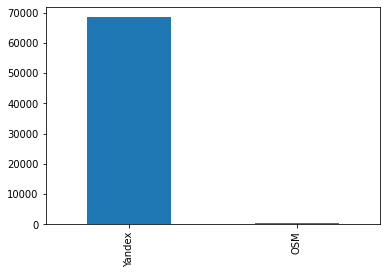

In [ ]:
print(event_df["GEO_API"].value_counts())
geo_api_bar_plot = event_df["GEO_API"].value_counts().plot.bar()
print(type(geo_api_bar_plot))

ADM3      57525
ADM1       9441
STREET     1694
ADM2        290
Name: GEO_PRECISION, dtype: int64


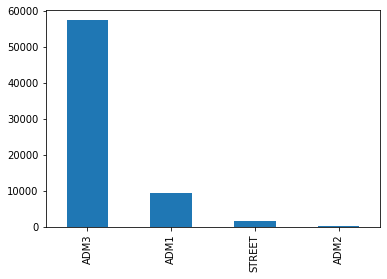

In [ ]:
print(event_df["GEO_PRECISION"].value_counts())
event_df["GEO_PRECISION"].value_counts().plot.bar()

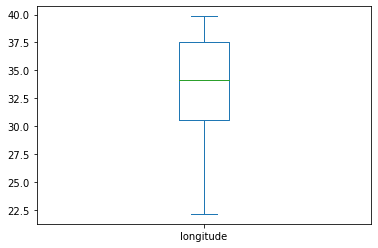

In [ ]:
event_df["longitude"].plot.box()

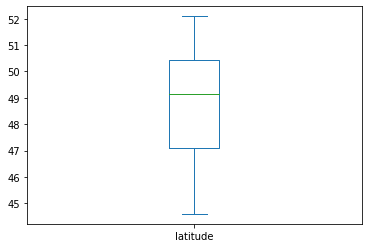

In [ ]:
event_df["latitude"].plot.box()

In [ ]:
event_df["address"]

0                      Украина, Донецкая область, Горловка
1                                          Украина, Донецк
2        Украина, 7, улица Александра Невского, Централ...
3                                         Украина, Харьков
4                                           Украина, Днепр
                               ...                        
68945    Україна, 4, Героїв Небесної Сотні алея, Бегіче...
68946    Украина, Запорожская область, Васильевский рай...
68947    Украина, Киевская область, Бучанский район, по...
68948    Україна, Кримського вулиця, Центр, Малин, Мали...
68949                         Украина, Житомирская область
Name: address, Length: 68950, dtype: object

In [ ]:
events_df['address'].map(str).str.match("^Украина").sum()

66909

## Report Document EDA

In [ ]:
report_df

,report_id,temporary_id,source,url,text,lang
0,40940,128550,ria,https://ria.ru/20220224/gorlovka-1774602728.html,"Украинские военные обстреляли Горловку, заявил...",ru
1,40940,128550,ria,https://ria.ru/20220224/gorlovka-1774602728.html,"Украинские военные обстреляли Горловку, заявил...",ru
2,18181,45730,liga,https://www.liga.net/archive/2022-02-24/all/pa...,Оккупанты перестали пропускать в Крым украинск...,ru
3,47245,172452,unian,https://www.unian.ua/news/archive/20220224,"На ніч закрили аеропорти Харкова, Дніпра та За...",ua
4,47245,172452,unian,https://www.unian.ua/news/archive/20220224,"На ніч закрили аеропорти Харкова, Дніпра та За...",ua
...,...,...,...,...,...,...
68945,32306,102062,nv,https://nv.ua/ukr/kyiv/rozminuvannya-u-kijivsk...,У Київській області сапери виявили та знищили ...,ua
68946,32307,102064,nv,https://nv.ua/ukr/ukraine/events/viyna-v-ukraj...,Війна — головне. В Україні продовжили воєнний ...,ua
68947,32308,102066,nv,https://nv.ua/ukr/ukraine/events/korabel-admir...,Новітній корабель Адмірал Макаров вирушив підс...,ua
68948,13759,33297,24tvua,https://24tv.ua/obstril-malina-zhitomirshhini-...,Обстріл Малина на Житомирщині: російські ракет...,ua


24tvua        15767
pravdaua      13336
nv             9661
unian          7913
ria            6983
interfaxua     4904
liga           3248
ntv            2819
mz             2050
forbesua        990
militarnyy      813
ng              329
kp              137
Name: source, dtype: int64


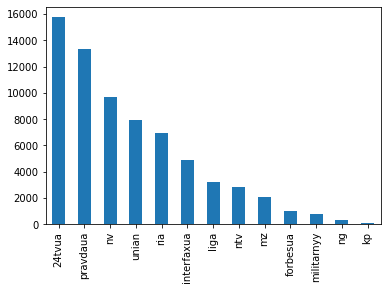

In [ ]:
print(report_df["source"].value_counts())
report_df["source"].value_counts().plot.bar()

ua    56669
ru    12281
Name: lang, dtype: int64


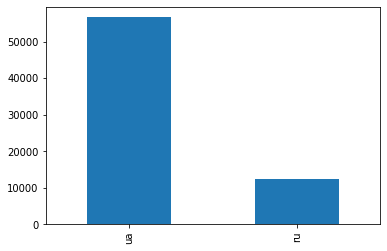

In [ ]:
print(report_df["lang"].value_counts())
report_df["lang"].value_counts().plot.bar()

In [ ]:
print(report_df["report_id"].value_counts())
#report_df["report_id"].value_counts().plot.bar()

21844    16
14157    15
22031    14
21784    13
21866    13
         ..
36379     1
43475     1
6446      1
27246     1
7275      1
Name: report_id, Length: 54344, dtype: int64


In [ ]:
print(report_df["temporary_id"].value_counts())

58496     16
34154     15
58754     14
58404     13
58531     13
          ..
115372     1
146072     1
15265      1
87686      1
17412      1
Name: temporary_id, Length: 54344, dtype: int64
